# VAT

In [1]:
import warnings
warnings.filterwarnings("ignore")

import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.datasets import mnist
from art.attacks import VirtualAdversarialMethod
from art.classifiers import KerasClassifier
from art.utils import load_mnist

Using TensorFlow backend.


## Step.1 完成数据处理

In [2]:
(x_train, y_train), (x_test, y_test), min_pixel_value, max_pixel_value = load_mnist(already_path = 'data/mnist.npz')

In [3]:
min_pixel_value

0.0

In [4]:
max_pixel_value

1.0

## Step.2 搭建模型并训练

In [5]:
model = Sequential()
model.add(Conv2D(filters=4, kernel_size=(5, 5), strides=1, activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=10, kernel_size=(5, 5), strides=1, activation='relu', input_shape=(23, 23, 4)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.SGD(lr=0.01), metrics=['accuracy'])

In [6]:
classifier = KerasClassifier(model=model, clip_values=(min_pixel_value, max_pixel_value), use_logits=False)
classifier.fit(x_train, y_train, batch_size=128, nb_epochs=3)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/3
938/937 [==============================] - 42s 44ms/step - loss: 0.6992 - acc: 0.7894
Epoch 2/3
938/937 [==============================] - 34s 37ms/step - loss: 0.2327 - acc: 0.9294
Epoch 3/3
938/937 [==============================] - 35s 37ms/step - loss: 0.1709 - acc: 0.9484


## Step.3 测试结果并攻击

In [10]:
predictions = classifier.predict(x_test[1000:1100])
accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test[1000:1100], axis=1)) / len(y_test[1000:1100])
print('Accuracy on benign test examples: {}%'.format(accuracy * 100))

Accuracy on benign test examples: 94.0%


In [21]:
attack = VirtualAdversarialMethod(classifier=classifier, max_iter=2, batch_size=50,eps=0.7)

In [22]:
x_test_adv = attack.generate(x=x_test[1000:1100])

开始第0个Batch
开始第0次训练
开始第1次训练
开始第1个Batch
开始第0次训练
开始第1次训练


In [23]:
predictions = classifier.predict(x_test_adv)
accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test[1000:1100], axis=1)) / len(y_test[1000:1100])
print('Accuracy on adversarial test examples: {}%'.format(accuracy * 100))

Accuracy on adversarial test examples: 81.0%


## Step.4 观看折腾后的数据

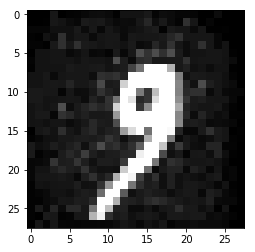

In [24]:
from matplotlib import pyplot as plt

plt.imshow(x_test_adv[0,:,:,0], cmap='gray')

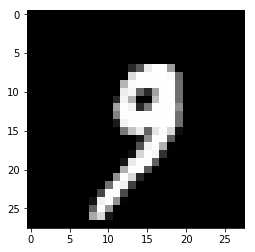

In [25]:
plt.imshow(x_test[1000,:,:,0], cmap='gray')